<a href="https://colab.research.google.com/github/moghanapriya-27/Datascience/blob/main/EX_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import datetime

%matplotlib inline
sns.set(style='whitegrid')


In [2]:
# Step 1: Load dataset into a dataframe
df = pd.read_csv("/content/netflix_titles1 (menyusun WF).csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:

print("Dataset Shape:", df.shape)
print("\nColumns and data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Dataset Shape: (6234, 12)

Columns and data types:
 show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing values:
 show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


type
Movie      4265
TV Show    1969
Name: count, dtype: int64


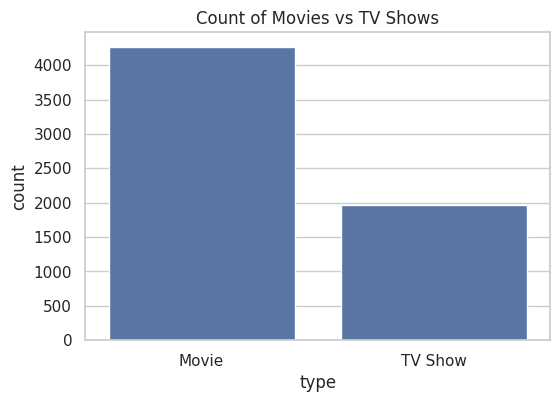

In [4]:
# Count Movies vs TV Shows
content_counts = df['type'].value_counts()
print(content_counts)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()


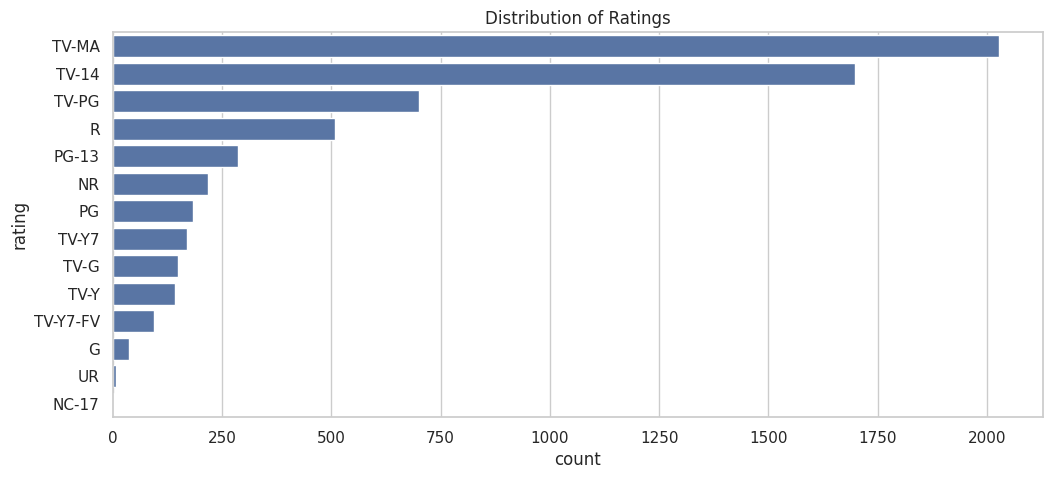

In [5]:
# Ratings distribution
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()


/tmp/ipython-input-4219299347.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='Country', x='Count', palette='viridis')


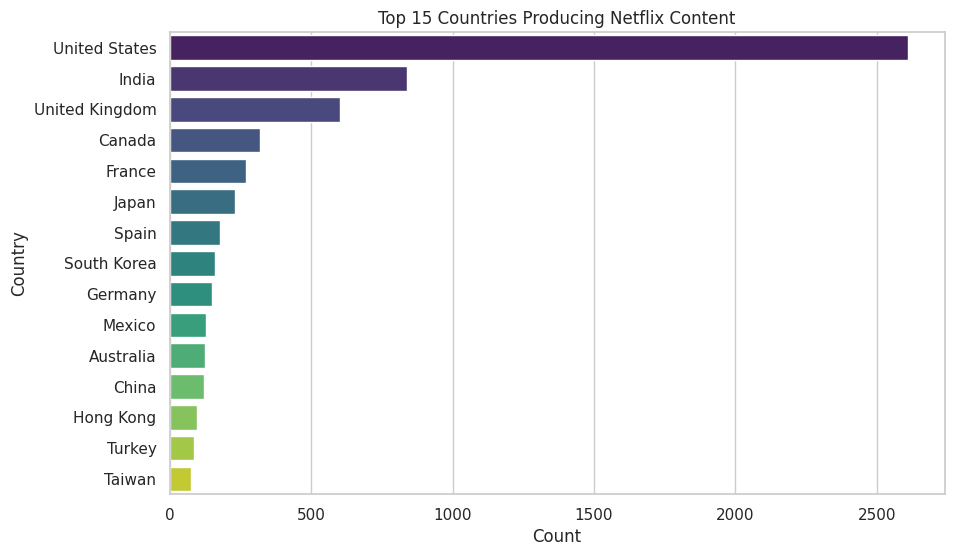

In [6]:
# Cleaning and splitting country column to count occurrences
from collections import Counter

# Drop missing countries
countries = df['country'].dropna().str.split(', ')

# Flatten the list of countries
all_countries = [country for sublist in countries for country in sublist]

country_counts = Counter(all_countries)
top_countries = pd.DataFrame(country_counts.most_common(15), columns=['Country', 'Count'])

# Plot top 15 countries
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, y='Country', x='Count', palette='viridis')
plt.title('Top 15 Countries Producing Netflix Content')
plt.show()


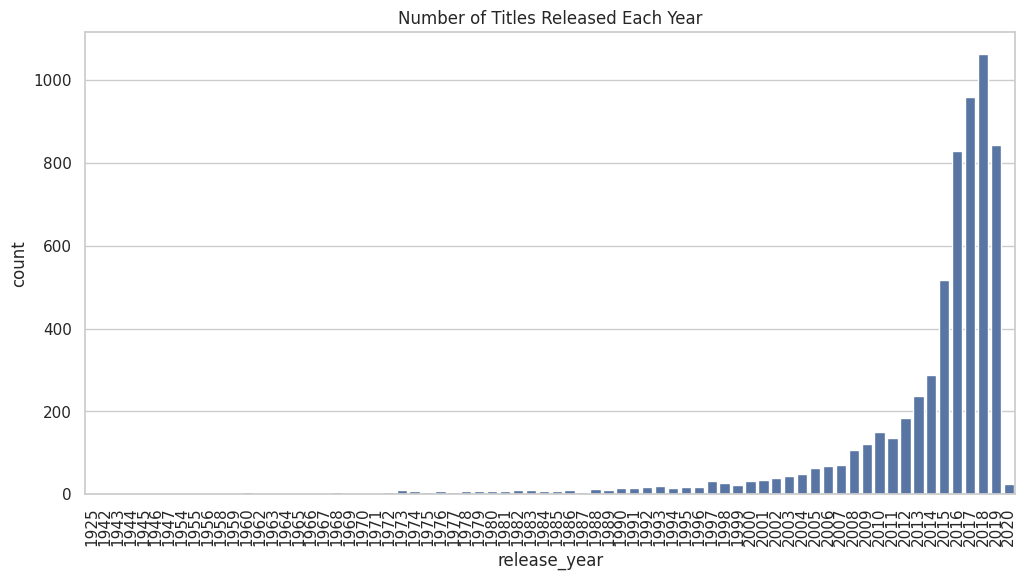

In [7]:
# Convert 'release_year' to int and plot
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title('Number of Titles Released Each Year')
plt.show()


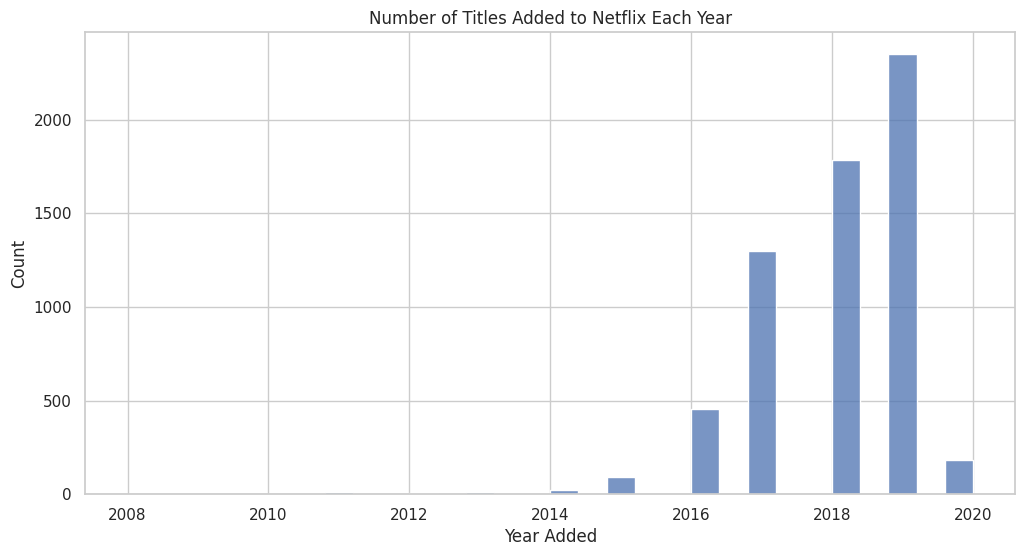

In [9]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

plt.figure(figsize=(12,6))
sns.histplot(df['date_added'].dt.year.dropna(), bins=30, kde=False)
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.show()

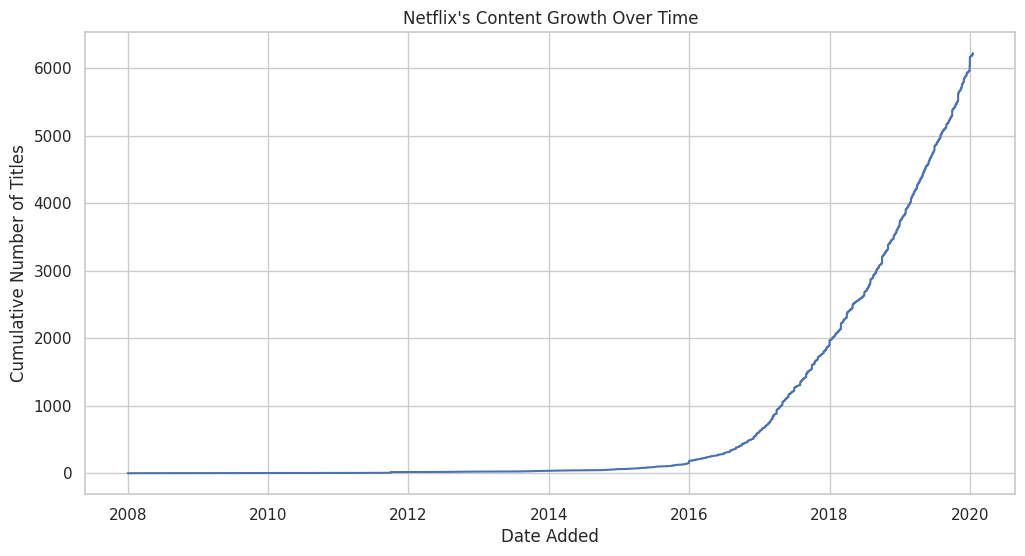

In [10]:
# Count cumulative content added over time
df_sorted = df.sort_values('date_added')
df_sorted['cumulative_content'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(12,6))
plt.plot(df_sorted['date_added'], df_sorted['cumulative_content'])
plt.title("Netflix's Content Growth Over Time")
plt.xlabel('Date Added')
plt.ylabel('Cumulative Number of Titles')
plt.show()


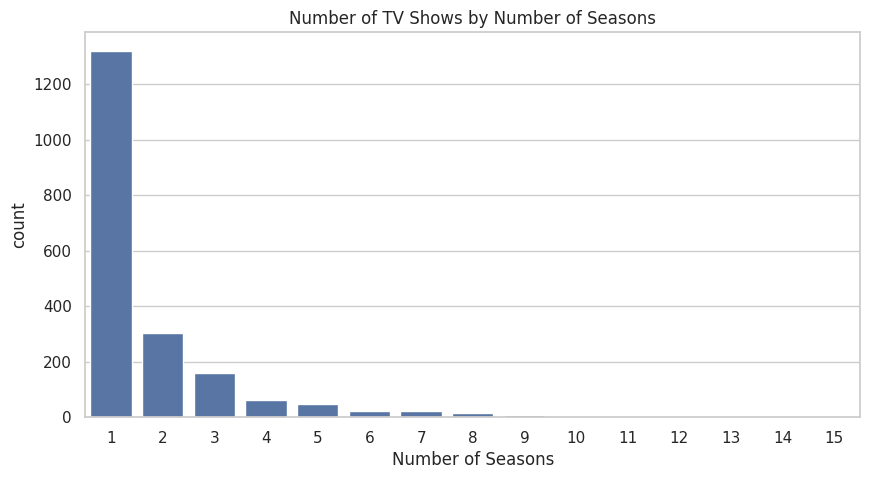

In [12]:
# Filter TV shows only and extract number of seasons
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.replace(r'\s*Seasons?', '', regex=True).astype(int)

plt.figure(figsize=(10,5))
sns.countplot(x='seasons', data=tv_shows.sort_values('seasons'))
plt.title('Number of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.show()

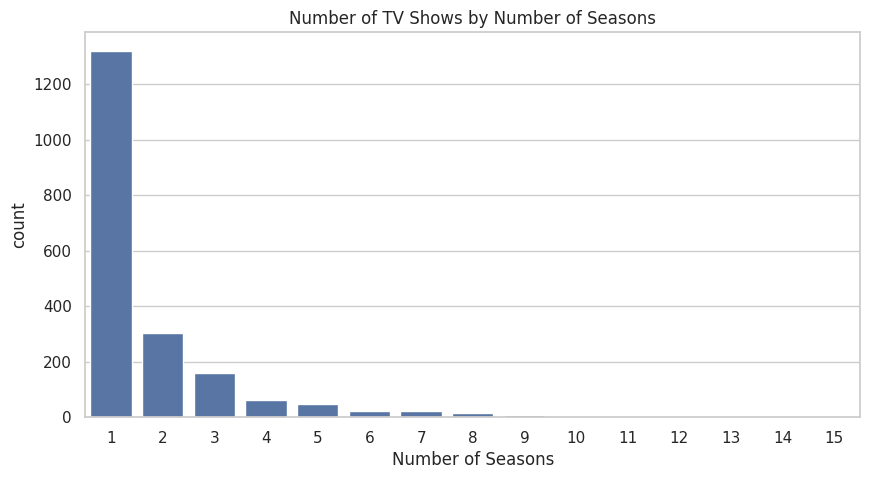

In [14]:
# Filter TV shows only and extract number of seasons
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.replace(r'\s*Seasons?', '', regex=True).astype(int)

plt.figure(figsize=(10,5))
sns.countplot(x='seasons', data=tv_shows.sort_values('seasons'))
plt.title('Number of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.show()

/tmp/ipython-input-3318816511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Genre', x='Count', palette='coolwarm')


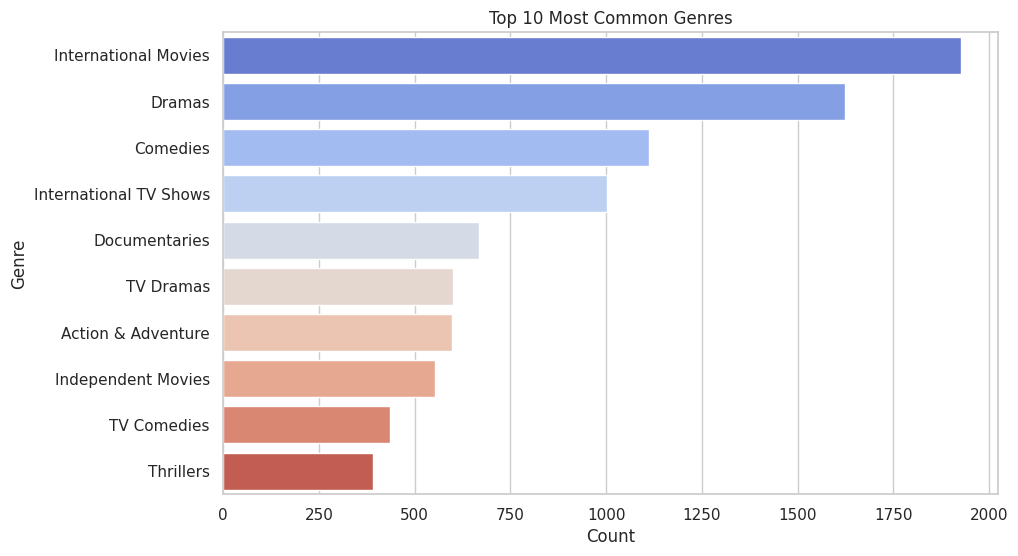

In [15]:
# Split genres and count
genres = df['listed_in'].str.split(', ')
all_genres = [genre.strip() for sublist in genres.dropna() for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, y='Genre', x='Count', palette='coolwarm')
plt.title('Top 10 Most Common Genres')
plt.show()


/tmp/ipython-input-298170628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, y='Director', x='Count', palette='magma')


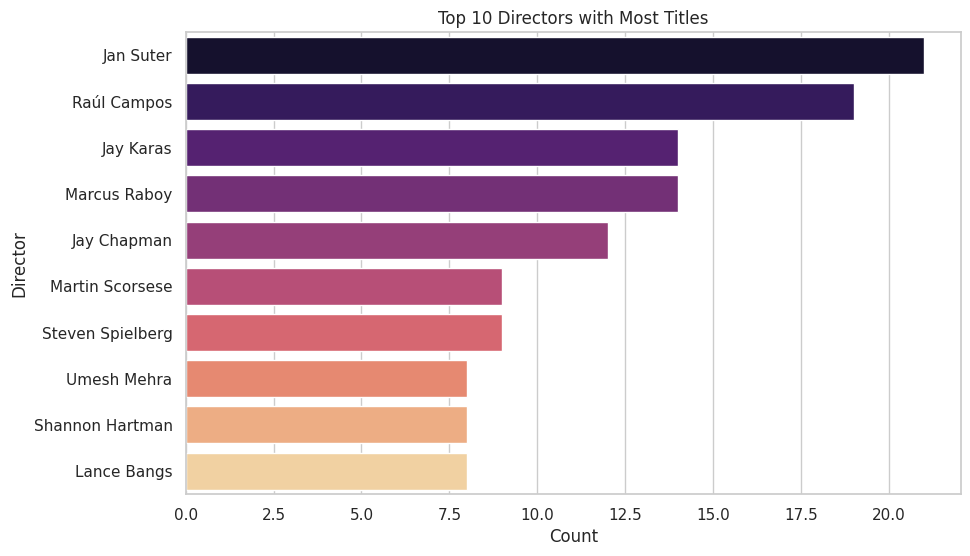

In [16]:
# Some titles may have multiple directors
directors = df['director'].dropna().str.split(', ')
all_directors = [director.strip() for sublist in directors for director in sublist]
director_counts = Counter(all_directors)
top_directors = pd.DataFrame(director_counts.most_common(10), columns=['Director', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_directors, y='Director', x='Count', palette='magma')
plt.title('Top 10 Directors with Most Titles')
plt.show()


/tmp/ipython-input-1246328405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, y='Actor', x='Count', palette='inferno')


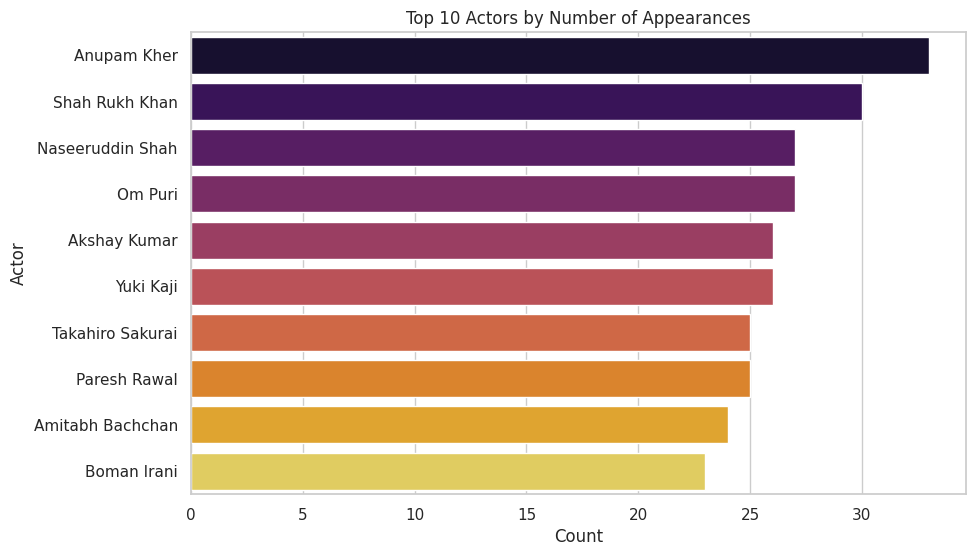

In [17]:
actors = df['cast'].dropna().str.split(', ')
all_actors = [actor.strip() for sublist in actors for actor in sublist]
actor_counts = Counter(all_actors)
top_actors = pd.DataFrame(actor_counts.most_common(10), columns=['Actor', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_actors, y='Actor', x='Count', palette='inferno')
plt.title('Top 10 Actors by Number of Appearances')
plt.show()


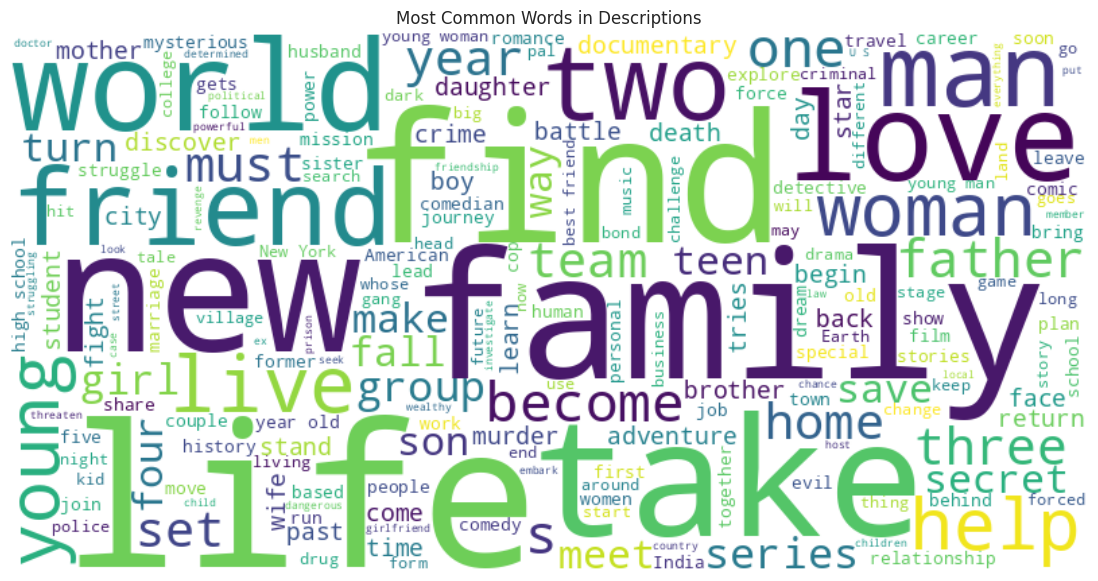

In [18]:
# Combine all descriptions into one text
text = " ".join(df['description'].dropna().values)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()


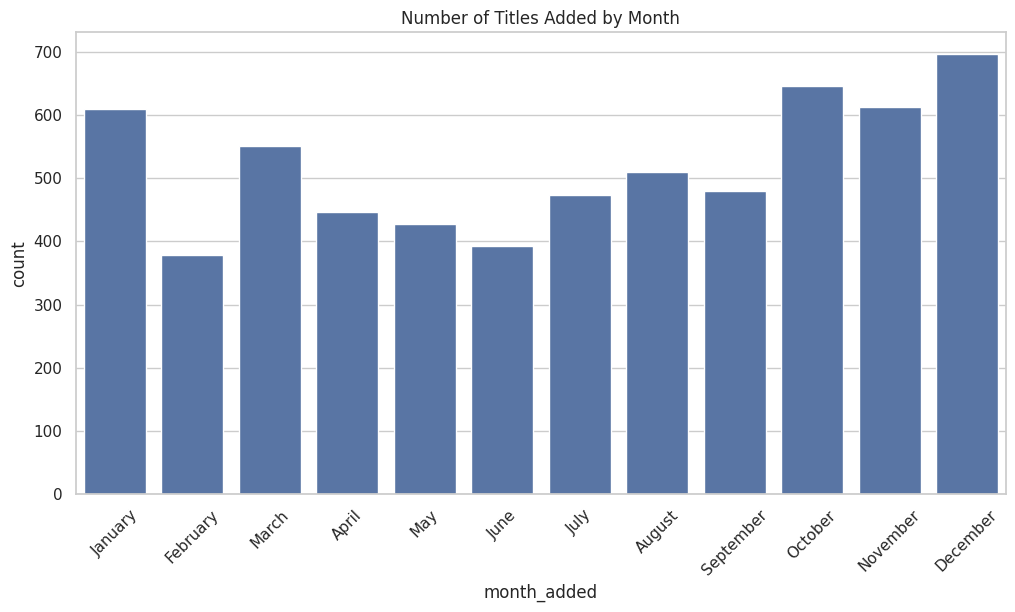

In [19]:
df['month_added'] = df['date_added'].dt.month_name()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month_added', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Number of Titles Added by Month')
plt.xticks(rotation=45)
plt.show()


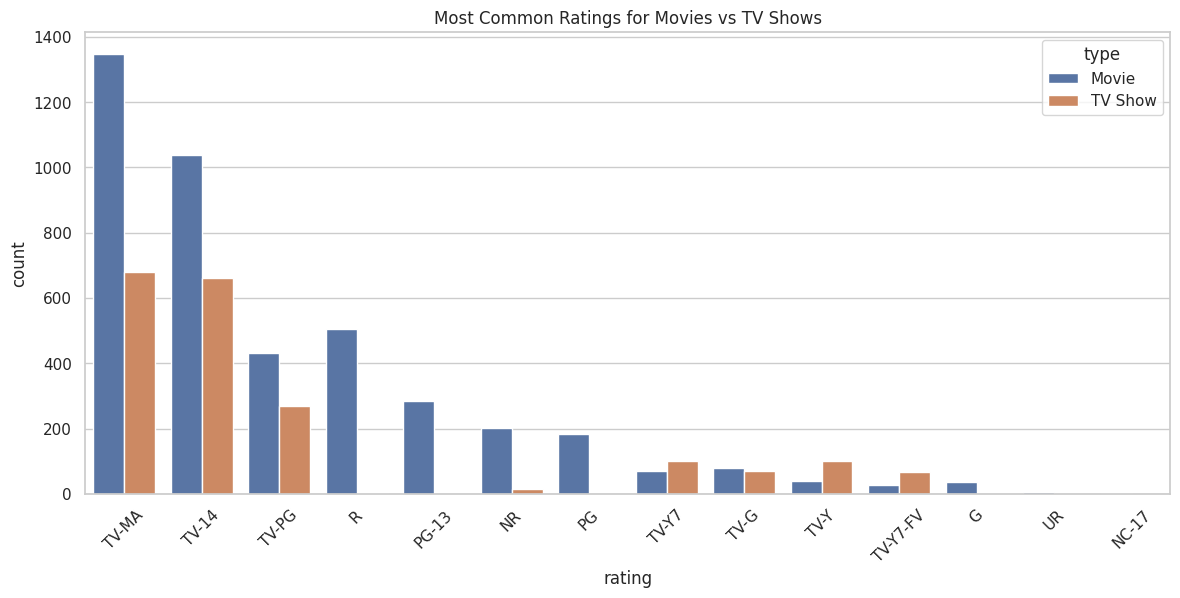

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Most Common Ratings for Movies vs TV Shows')
plt.xticks(rotation=45)
plt.show()


In [21]:
oldest_title = df.loc[df['release_year'].idxmin()]
newest_title = df.loc[df['release_year'].idxmax()]

print("Oldest Title:\n", oldest_title[['title', 'release_year', 'type']])
print("\nNewest Title:\n", newest_title[['title', 'release_year', 'type']])


Oldest Title:
 title           Pioneers: First Women Filmmakers*
release_year                                 1925
type                                      TV Show
Name: 4292, dtype: object

Newest Title:
 title           Maradona in Mexico
release_year                  2020
type                       TV Show
Name: 1315, dtype: object


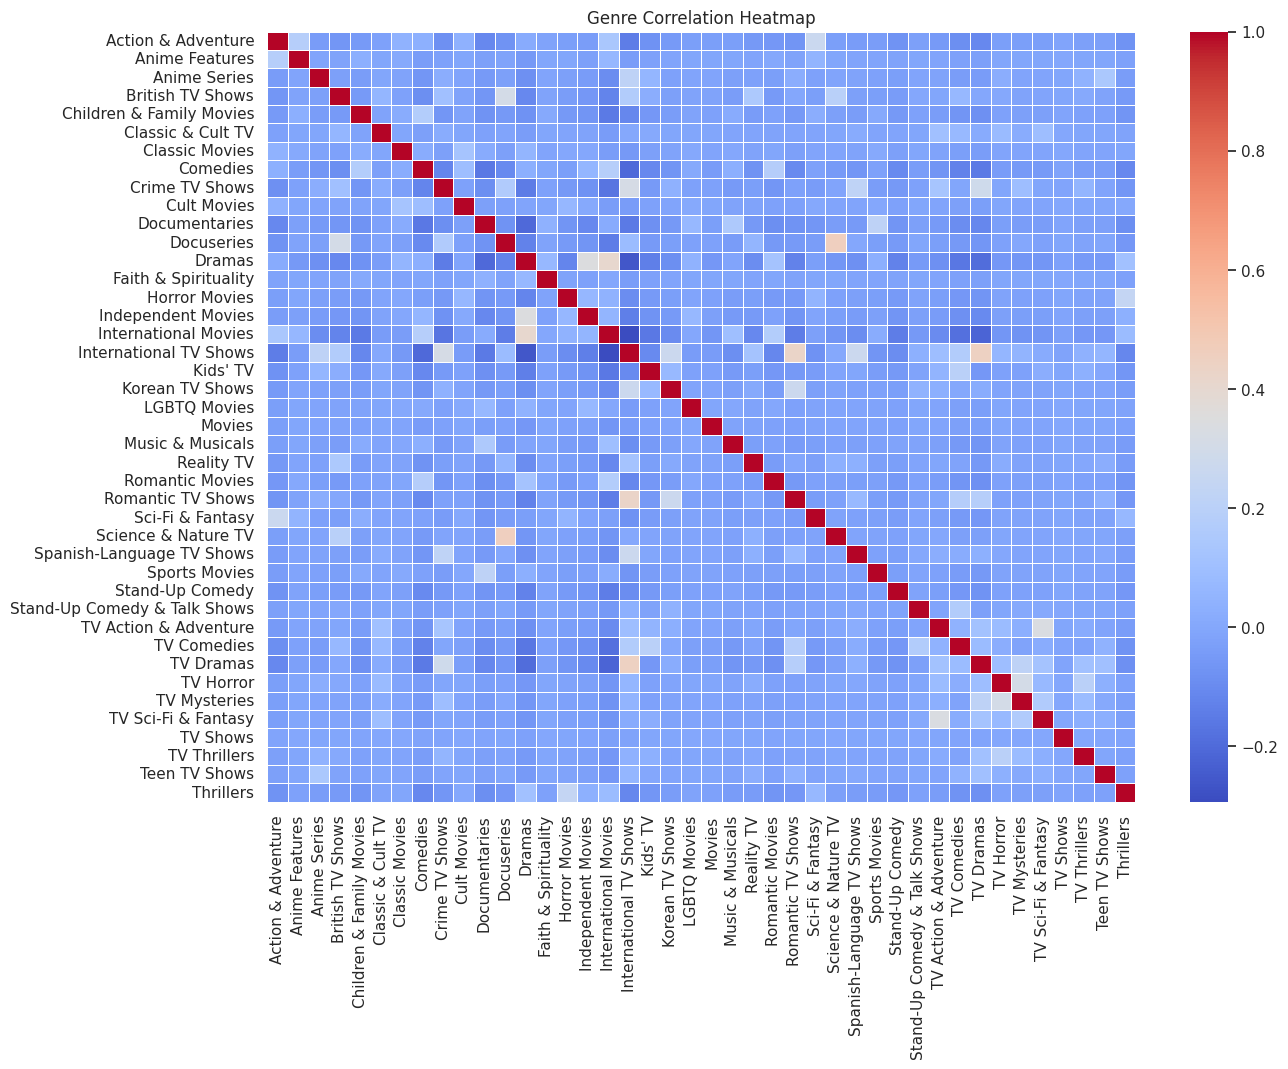

In [22]:
# Create a multi-label binarizer for genres
from sklearn.preprocessing import MultiLabelBinarizer

genres = df['listed_in'].str.split(', ')
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(genres.dropna())

genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Correlation matrix between genres
corr = genre_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Genre Correlation Heatmap')
plt.show()
